### Econ 176 APIs Day 2

We're back! [Here was Day 1](https://colab.research.google.com/drive/1laKhKCXTFtCAGKrOqQfisbGPyQE-xexm#scrollTo=nCAN5xmzEP9t&uniqifier=1)

<font size="-1">Today, we'll continue building familiarity with APIs through calling and analyzing the results (using Python, of course!)

#### Where were we?

We had tried the International Space Station API at [http://api.open-notify.org/iss-now.json](http://api.open-notify.org/iss-now.json) :

In [26]:
# we assign the url and obtain the api-call result into result
#    Note that result will be an object that contains many fields (not a simple string)
#

import requests

url = "http://api.open-notify.org/iss-now.json"   # this is sometimes called an "endpoint" ...
result = requests.get(url)
result

# if it succeeds, you should see <Response [200]>

<Response [200]>

In [27]:
#
# In this case, we know the result is a JSON file, and we can obtain it that way:

json_contents = result.json()      # needs to convert the text to a json dictionary...
print(f"json_contents is {json_contents}")     # Aha!  Let's re/introduce f-strings...

# Take a look... remember that a json object is a Python dictionary:

json_contents is {'timestamp': 1739296801, 'message': 'success', 'iss_position': {'longitude': '0.3268', 'latitude': '-27.2427'}}


In [28]:
#
# Let's remind ourselves how dictionaries work:

lat = json_contents['iss_position']['latitude']
lat = float(lat)
print("lat: ", lat)

lat:  -27.2427


In [29]:
from math import *
def haversine(lat1, long1, lat2, long2):
    """
    Calculate the great circle distance in kilometers between two points
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians
    long1, lat1, long2, lat2 = map(radians, [long1, lat1, long2, lat2])

    # haversine formula
    dlong = long2 - long1
    dlat = lat2 - lat1
    trig = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlong/2)**2
    # Radius of earth. Use 3956 for miles. 6371 for km.
    radius = 3956  # we'll use miles!
    return radius * 2 * asin(sqrt(trig))

Here is a function that returns the distance detween two (lat/long) pairs:


<font size="-2">

```   
def haversine(lat1, long1, lat2, long2):
    """
    Calculate the great circle distance in kilometers between two points
    on the earth (specified in decimal degrees)
    """
    from math import *
    # convert decimal degrees to radians
    long1, lat1, long2, lat2 = map(radians, [long1, lat1, long2, lat2])

    # haversine formula
    dlong = long2 - long1
    dlat = lat2 - lat1
    trig = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlong/2)**2
    # Radius of earth. Use 3956 for miles. 6371 for km.
    radius = 3956  # we'll use miles!
    return radius * 2 * asin(sqrt(trig))
```
</font>

#### <font color="Coral"><b>Task 0</b></font> &nbsp;&nbsp; Let's, together, create a program that finds the distance from the ISS to Claremont
+ It can just be a cell, it doesn't have to be its own function.
+ But, let's definitely use the haversine function, above...





In [30]:
import requests

url = "http://api.open-notify.org/iss-now.json"   # this is sometimes called an "endpoint" ...
result = requests.get(url)
result

json_contents = result.json()      # needs to convert the text to a json dictionary...
print(f"json_contents is {json_contents}")

lat = json_contents['iss_position']['latitude']
lat = float(lat)
print("lat: ", lat)


lon = json_contents['iss_position']['longitude']
lon = float(lon)
print("lon: ", lon)

claremont_lat = 34.0967
claremont_lon = 117.7198
result = haversine(lat, lon, claremont_lat, claremont_lon)

print(result)

json_contents is {'timestamp': 1739296804, 'message': 'success', 'iss_position': {'longitude': '0.4673', 'latitude': '-27.3820'}}
lat:  -27.382
lon:  0.4673
8732.813839712637


In [31]:
#
# Then, let's compare with AI's result...
#

Vice-versa is ok, too...

<br>
<hr>
<br>

<b>Let's try another ISS "endpoint" ~ one with all of the <i>people</i> in space.</b>

It's at this url:  [http://api.open-notify.org/astros.json](http://api.open-notify.org/astros.json)

In [32]:
#
# we assign the url and use requests.get to obtain the result into result_astro
#
#    Remember, result_astro will be an object that contains many fields (not a simple string)
#

import requests

url = "http://api.open-notify.org/astros.json"   # this is sometimes called an "endpoint" ...
result_astro = requests.get(url)
result_astro

# if it succeeded, you should see <Response [200]>

<Response [200]>

In [33]:
# If the request succeeded, we know the result is a JSON file, and we can obtain it that way.
# Let's call our dictionary something more specific:

astronauts = result_astro.json()
d = astronauts   # a shorter variable for convenience..


# Remember:  astronauts will be a _dictionary_
note = """ here's yesterday evening's result - it _should_ be the same this morning!

{"people": [{"craft": "ISS", "name": "Oleg Kononenko"}, {"craft": "ISS", "name": "Nikolai Chub"},
{"craft": "ISS", "name": "Tracy Caldwell Dyson"}, {"craft": "ISS", "name": "Matthew Dominick"},
{"craft": "ISS", "name": "Michael Barratt"}, {"craft": "ISS", "name": "Jeanette Epps"},
{"craft": "ISS", "name": "Alexander Grebenkin"}, {"craft": "ISS", "name": "Butch Wilmore"},
{"craft": "ISS", "name": "Sunita Williams"}, {"craft": "Tiangong", "name": "Econ176_Participant_6 Guangsu"},
{"craft": "Tiangong", "name": "Econ176_Participant_6 Cong"}, {"craft": "Tiangong", "name": "Ye Guangfu"}], "number": 12, "message": "success"}
"""
print(d)

{'people': [{'craft': 'ISS', 'name': 'Oleg Kononenko'}, {'craft': 'ISS', 'name': 'Nikolai Chub'}, {'craft': 'ISS', 'name': 'Tracy Caldwell Dyson'}, {'craft': 'ISS', 'name': 'Matthew Dominick'}, {'craft': 'ISS', 'name': 'Michael Barratt'}, {'craft': 'ISS', 'name': 'Jeanette Epps'}, {'craft': 'ISS', 'name': 'Alexander Grebenkin'}, {'craft': 'ISS', 'name': 'Butch Wilmore'}, {'craft': 'ISS', 'name': 'Sunita Williams'}, {'craft': 'Tiangong', 'name': 'Econ176_Participant_6 Guangsu'}, {'craft': 'Tiangong', 'name': 'Econ176_Participant_6 Cong'}, {'craft': 'Tiangong', 'name': 'Ye Guangfu'}], 'number': 12, 'message': 'success'}


In [34]:
d['people']

[{'craft': 'ISS', 'name': 'Oleg Kononenko'},
 {'craft': 'ISS', 'name': 'Nikolai Chub'},
 {'craft': 'ISS', 'name': 'Tracy Caldwell Dyson'},
 {'craft': 'ISS', 'name': 'Matthew Dominick'},
 {'craft': 'ISS', 'name': 'Michael Barratt'},
 {'craft': 'ISS', 'name': 'Jeanette Epps'},
 {'craft': 'ISS', 'name': 'Alexander Grebenkin'},
 {'craft': 'ISS', 'name': 'Butch Wilmore'},
 {'craft': 'ISS', 'name': 'Sunita Williams'},
 {'craft': 'Tiangong', 'name': 'Econ176_Participant_6 Guangsu'},
 {'craft': 'Tiangong', 'name': 'Econ176_Participant_6 Cong'},
 {'craft': 'Tiangong', 'name': 'Ye Guangfu'}]

This is pretty intricate!

Let's try unpacking this - _parsing it_ - with an in-class, break-out challenge...

In [35]:
print(len(d))

3


In [36]:
print(type(d['people']))

<class 'list'>


In [37]:
count = 0
for entry in d['people']:
  if entry['craft'] == "ISS":
    count += 1
print(count)

9


In [38]:
print(d['people'][-4]['name'])

Sunita Williams


In [39]:
print(d['people'][0]['name'][7:9])

no


#### <font color="Coral"><b>Task 1</b></font>: &nbsp;&nbsp; In-class break-out ...

<br>
<hr>
<br>

### Ok!  

#### You should add to your resume that
+ you have experience with traditional _web-scraping_
+ and with making - and interpreting - _API calls_
+ whether they convey plain-text or json-structured data...

<br>

Let's go deeper, to
+ see how the API "endpoints" themselves are implemented
+ see how parameters can be used in calling API endpoints
  + at least, with GET requests
  + POST requests are also common - that's for another day


### _Behind the Curtain_ of an API:

Let's watch _inside_ API calls, using CodeSandbox...

Specifically, let's practice using <u>parameters</u> to an API call:


### GET parameters

The GET request includes all of the information needed in the URL itself!

Here are a couple of images showing the _pieces_ of urls:

<img src="https://static.semrush.com/blog/uploads/media/ca/37/ca3737d8edb5cf079aaf1f11ae01d286/mMREmiwXSrryVyv8IxbVFgje7ICFhfqWnca7W0db36KjX35vzLTnStkFynEd9NBoXXH-JYKCm2deskxgLo_vxzEvl-qLpVOgtwc78rhFI2Rm1pBK-j2SwMKWz0CXU42STjzUVcF1vaRTFbw_6wvH_5A.webp">

#### Using query-string parameters

**Challenge!**

Team up with people nearby and make API calls to the endpoints

+ `url = "https://fvcjsw-5000.csb.app/econ176_mystery0"`
+ `url = "https://fvcjsw-5000.csb.app/econ176_mystery1"`
+ `url = "https://fvcjsw-5000.csb.app/econ176_mystery2"`
+ `url = "https://fvcjsw-5000.csb.app/econ176_mystery3"`

_each_ of which uses query-string parameters
+ `x` (an integer) and
+ `y` (an integer)

and see if you can determine what each one is doing... and how the parameters are being used?!

<br>



In [40]:
#
# Try it - from a browser or from here...

import requests

url = "https://fvcjsw-5000.csb.app/econ176_mystery0?x=1&y=3"    # perhaps try from browser first!
result_ft = requests.get(url)
# print(result_ft)              # prints the status_code

#d = result_ft.json()            # here are the _contents_
#d

We can create larger custom API calls, as well...

For example,

In [60]:
#
# A larger API call to the same CodeSandbox server

import requests

url = "https://fvcjsw-5000.csb.app/fintech"    # try this from your browser first!
result_ft = requests.get(url)
result_ft

<Response [503]>

In [42]:
#
# Let's view ... then parse and interpret!

#d = result_ft.json()                  # try .text, as well...
print(f"The resulting data is {d}")

The resulting data is {'people': [{'craft': 'ISS', 'name': 'Oleg Kononenko'}, {'craft': 'ISS', 'name': 'Nikolai Chub'}, {'craft': 'ISS', 'name': 'Tracy Caldwell Dyson'}, {'craft': 'ISS', 'name': 'Matthew Dominick'}, {'craft': 'ISS', 'name': 'Michael Barratt'}, {'craft': 'ISS', 'name': 'Jeanette Epps'}, {'craft': 'ISS', 'name': 'Alexander Grebenkin'}, {'craft': 'ISS', 'name': 'Butch Wilmore'}, {'craft': 'ISS', 'name': 'Sunita Williams'}, {'craft': 'Tiangong', 'name': 'Econ176_Participant_6 Guangsu'}, {'craft': 'Tiangong', 'name': 'Econ176_Participant_6 Cong'}, {'craft': 'Tiangong', 'name': 'Ye Guangfu'}], 'number': 12, 'message': 'success'}


**Challenge**:   extract your initials from `d`   &nbsp;&nbsp; 😀


<b><font color="DodgerBlue">Hint</font></b>: &nbsp;&nbsp; Start with &nbsp;&nbsp;  ``d[ <something> ]``   &nbsp;&nbsp;   What's the ``something``?

<i>Only do one step at a time...</i>  &nbsp;&nbsp; This is key!

In [43]:
#
# see if you can extract only your initials from d
d

# we're not finished yet! :)

{'people': [{'craft': 'ISS', 'name': 'Oleg Kononenko'},
  {'craft': 'ISS', 'name': 'Nikolai Chub'},
  {'craft': 'ISS', 'name': 'Tracy Caldwell Dyson'},
  {'craft': 'ISS', 'name': 'Matthew Dominick'},
  {'craft': 'ISS', 'name': 'Michael Barratt'},
  {'craft': 'ISS', 'name': 'Jeanette Epps'},
  {'craft': 'ISS', 'name': 'Alexander Grebenkin'},
  {'craft': 'ISS', 'name': 'Butch Wilmore'},
  {'craft': 'ISS', 'name': 'Sunita Williams'},
  {'craft': 'Tiangong', 'name': 'Econ176_Participant_6 Guangsu'},
  {'craft': 'Tiangong', 'name': 'Econ176_Participant_6 Cong'},
  {'craft': 'Tiangong', 'name': 'Ye Guangfu'}],
 'number': 12,
 'message': 'success'}

Website is down, unable to do above

<br>
<hr>
<br>

### Another API, now _finance-inspired_ ...

There are **lots** of finance APIs. I'm currently skeptical that they're materially different, though I'm happy to be convinced... .

One material difference is price! The kind folks at _Alphavantage_ have offered us an Econ176-specific set of API keys. Let's dive in!

Before using your key, try a demonostration call at this endpoint:

`https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&apikey=demo`

which, as ever, is this link:

[https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&apikey=demo](https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&apikey=demo)

You'll see that it's the last 100 days of information from IBM. To obtain other symbols' data - or other data - you'll need to use your API key. Notice that the demo url, above, has `demo` as the `apikey` (it only works for IBM 😀)

### Getting comfortable with documentation...

APIs come with widely varying documentation
+ sometimes you're guessing (as we did above!)
+ more often, they're documented... **but** the documentation tends to have lots of idiosynrasies (there's not as much standardization as one might hope on how these things are discussed, the computing languages presumed, etc.)

So, it's a worthy task - and challenge - to get familiar with the many kinds and conventions of documentation out there.

Take a look at the [Alphvantage documentation](https://www.alphavantage.co/documentation/):
+ specifically, find the section for the `TIME_SERIES_DAILY` function
+ read over the parameters
+ click on some of the examples
+ see if you can reconcile the outputs you're seeing with the parameters provided

Next, we'll try it out...

... and will determine the best "single-share" strategy for investing -- for your choice of stock -- over the past 100 days. <br> <font size="-2">(You might remember this as a cs5 homework, the ["TT Securities" problem](https://www.cs.hmc.edu/twiki/bin/view/CS5Fall2023/TTSecuritiesGold).)</font>

<br>
<hr>
<br>

### Your tasks!

**<font color="Coral">Part 1</font>: &nbsp;&nbsp; <font color="DodgerBlue">Single-share Analysis</font>** &nbsp; using TIME_SERIES_DAILY

So, your tasks include
+ get your API working - the first cell below will help
+ make sure you're getting data! - the second cell below will help with that!
+ choose another stock symbol
  + for now, let's stick with the compact data of the last 100 days
  + also, be sure to make _one_ call and then code-develop with that data
  + it will quickly annoy API providers if you make too many calls
  + there are automatic "shutoffs" to stop responding in this case...
  + it's not clear when the "shutoff" stops - possibly never

<br>

So, after making one call, explore the resulting data (dictionary) so that you
+ programmatically extract the 100 prices (let's use the **closing** price)
+ create a list with them
+ find the maximum and the minimum
  + also find the _date_ of the max and the _date_ of the min
  + be sure to print those out...
+ create a **graph** of your list &nbsp; (suggestion: use AI for graphing help)
  + get the AI to highlight the max and the min
+ "Single-share" analysis: &nbsp; Find the buy day and sell day that maximize `(sell price - buy price)`
  + make sure that you sell _at or after_ you buy...
+ print your results
+ re-graph your 100-day signal, and highlight the buy day and the sell day you just found
  + you might ask to use ``seaborn`` or ``matplotlib`` - both are libraries available in Colab (and libraries that the AI knows well)

<br>

Once you have a workflow that works, try it with a different stock symbol!
+ do the same thing for the other signal: print the best single-share strategy - and graph
+ compare the results in your overall reflection below
+ you could wrap the workflow pieces into a function that takes a stock symbol as input! (This is optional and cs-y.)

<br>

**<font color="Coral">Part 2</font>: &nbsp;&nbsp; <font color="DodgerBlue">Use and Analyze <u>another</u> Alphavantage API</font>** &nbsp; ... of your choice
+ Look over the left-hand column of APIs in the [Alphavantage documentation](https://www.alphavantage.co/documentation/)
+ Choose another API that seems interesting to you, then
+ Explore and tinker to successfully use it, then
+ Analyze a subset of the data from the resulting call, then
+ Share, briefly, what you found.
  + The analysis does not need to be involved. For example,
  + finding the max and min of a value is wonderful - and definitely enough
  + or, the average, or sum, or ... really anything,
  + as long as it means you've looked through each time step of the data-sequence received  <font size="-1">(not each piece of data, just each time step)</font>
+ <font color="Coral"><b>EC</b></font> Totally optional: <font size="-1">Find a function for comparing time-series trends, import it, and then use it to compare one of your stock prices with your _other_ Alphavantage signal. Report what you find! (up to +10%)</font>

<br>

Some of the other APIs that look especially interesting, at least to me:
+ News & Sentiments
+ Income Statement / Balance Sheet
+ GDP per capita
+ Exchange rates
+ Coffee!



<br>
<hr>
<br>

### Let's start!

In [44]:
#
# Let's request!   Just using the demo, for now:

import requests

url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=MSFT&apikey=demo"    # demo version
result = requests.get(url)
result

<Response [200]>

In [45]:
#
# Let's view ... then parse and interpret!

d = result.json()                       # probably _don't_ try .text here!
print(f"The resulting data's keys are {list(d.keys())}")

The resulting data's keys are ['Meta Data', 'Time Series (Daily)']


In [46]:
#
# Let's look at all of the keys...

for k in d['Time Series (Daily)']:
    print(k)

# Aha! they are dates... let's create a function to compare two dates

2025-02-10
2025-02-07
2025-02-06
2025-02-05
2025-02-04
2025-02-03
2025-01-31
2025-01-30
2025-01-29
2025-01-28
2025-01-27
2025-01-24
2025-01-23
2025-01-22
2025-01-21
2025-01-17
2025-01-16
2025-01-15
2025-01-14
2025-01-13
2025-01-10
2025-01-08
2025-01-07
2025-01-06
2025-01-03
2025-01-02
2024-12-31
2024-12-30
2024-12-27
2024-12-26
2024-12-24
2024-12-23
2024-12-20
2024-12-19
2024-12-18
2024-12-17
2024-12-16
2024-12-13
2024-12-12
2024-12-11
2024-12-10
2024-12-09
2024-12-06
2024-12-05
2024-12-04
2024-12-03
2024-12-02
2024-11-29
2024-11-27
2024-11-26
2024-11-25
2024-11-22
2024-11-21
2024-11-20
2024-11-19
2024-11-18
2024-11-15
2024-11-14
2024-11-13
2024-11-12
2024-11-11
2024-11-08
2024-11-07
2024-11-06
2024-11-05
2024-11-04
2024-11-01
2024-10-31
2024-10-30
2024-10-29
2024-10-28
2024-10-25
2024-10-24
2024-10-23
2024-10-22
2024-10-21
2024-10-18
2024-10-17
2024-10-16
2024-10-15
2024-10-14
2024-10-11
2024-10-10
2024-10-09
2024-10-08
2024-10-07
2024-10-04
2024-10-03
2024-10-02
2024-10-01
2024-09-30

In [47]:
#
# here is one way to make a list of all of the dates:

DATES = list(d['Time Series (Daily)'].keys())
DATES

# Notice, they're backwards!

['2025-02-10',
 '2025-02-07',
 '2025-02-06',
 '2025-02-05',
 '2025-02-04',
 '2025-02-03',
 '2025-01-31',
 '2025-01-30',
 '2025-01-29',
 '2025-01-28',
 '2025-01-27',
 '2025-01-24',
 '2025-01-23',
 '2025-01-22',
 '2025-01-21',
 '2025-01-17',
 '2025-01-16',
 '2025-01-15',
 '2025-01-14',
 '2025-01-13',
 '2025-01-10',
 '2025-01-08',
 '2025-01-07',
 '2025-01-06',
 '2025-01-03',
 '2025-01-02',
 '2024-12-31',
 '2024-12-30',
 '2024-12-27',
 '2024-12-26',
 '2024-12-24',
 '2024-12-23',
 '2024-12-20',
 '2024-12-19',
 '2024-12-18',
 '2024-12-17',
 '2024-12-16',
 '2024-12-13',
 '2024-12-12',
 '2024-12-11',
 '2024-12-10',
 '2024-12-09',
 '2024-12-06',
 '2024-12-05',
 '2024-12-04',
 '2024-12-03',
 '2024-12-02',
 '2024-11-29',
 '2024-11-27',
 '2024-11-26',
 '2024-11-25',
 '2024-11-22',
 '2024-11-21',
 '2024-11-20',
 '2024-11-19',
 '2024-11-18',
 '2024-11-15',
 '2024-11-14',
 '2024-11-13',
 '2024-11-12',
 '2024-11-11',
 '2024-11-08',
 '2024-11-07',
 '2024-11-06',
 '2024-11-05',
 '2024-11-04',
 '2024-11-

In [48]:
#
# Let's flip the DATES around:
DATES.reverse()
DATES

# Yay!

['2024-09-17',
 '2024-09-18',
 '2024-09-19',
 '2024-09-20',
 '2024-09-23',
 '2024-09-24',
 '2024-09-25',
 '2024-09-26',
 '2024-09-27',
 '2024-09-30',
 '2024-10-01',
 '2024-10-02',
 '2024-10-03',
 '2024-10-04',
 '2024-10-07',
 '2024-10-08',
 '2024-10-09',
 '2024-10-10',
 '2024-10-11',
 '2024-10-14',
 '2024-10-15',
 '2024-10-16',
 '2024-10-17',
 '2024-10-18',
 '2024-10-21',
 '2024-10-22',
 '2024-10-23',
 '2024-10-24',
 '2024-10-25',
 '2024-10-28',
 '2024-10-29',
 '2024-10-30',
 '2024-10-31',
 '2024-11-01',
 '2024-11-04',
 '2024-11-05',
 '2024-11-06',
 '2024-11-07',
 '2024-11-08',
 '2024-11-11',
 '2024-11-12',
 '2024-11-13',
 '2024-11-14',
 '2024-11-15',
 '2024-11-18',
 '2024-11-19',
 '2024-11-20',
 '2024-11-21',
 '2024-11-22',
 '2024-11-25',
 '2024-11-26',
 '2024-11-27',
 '2024-11-29',
 '2024-12-02',
 '2024-12-03',
 '2024-12-04',
 '2024-12-05',
 '2024-12-06',
 '2024-12-09',
 '2024-12-10',
 '2024-12-11',
 '2024-12-12',
 '2024-12-13',
 '2024-12-16',
 '2024-12-17',
 '2024-12-18',
 '2024-12-

In [49]:
# Oooh... Now let's see what's in each key (date)

d['Time Series (Daily)']['2025-01-21']  # Aha! it's a dictionary again!  We will need to index again!!

{'1. open': '430.2000',
 '2. high': '430.8999',
 '3. low': '425.5950',
 '4. close': '428.5000',
 '5. volume': '26085703'}

In [50]:
# A small function to get the closing price on a date (date) using data (dictionary) d
def get_closing(date, d):
    close = float(d['Time Series (Daily)'][date]['4. close'])
    return close

In [52]:
# A loop to find the minimum closing price
#

min_price = 10000000
min_key = "nothing"

for date in d['Time Series (Daily)']:
    close =  get_closing(date, d)
    # print(f"date is {date} and closing is {closing}")
    if close < min_price:
        min_price = close
        min_price_date = date

print(f"min_price_date is {min_price_date} and {min_price = }")

min_price_date is 2024-10-31 and min_price = 406.35


#### Onward into the tasks, as listed above...
+ perhaps first, make sure you can repeat the above cells with a _different_ stock ticker
+ perhaps then create a **list** of all of the closing prices
+ from there, you're ready for the analysis + graphing...

In [53]:
import requests


url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=MSFT&apikey=147LGXMNKZFU94BN"
result = requests.get(url)
d = result.json()

url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=TSLA&apikey=147LGXMNKZFU94BN"
result2 = requests.get(url)
d2 = result2.json()


Maximum price: 454.46 on 2024-12-17
Minimum price: 406.35 on 2024-10-31


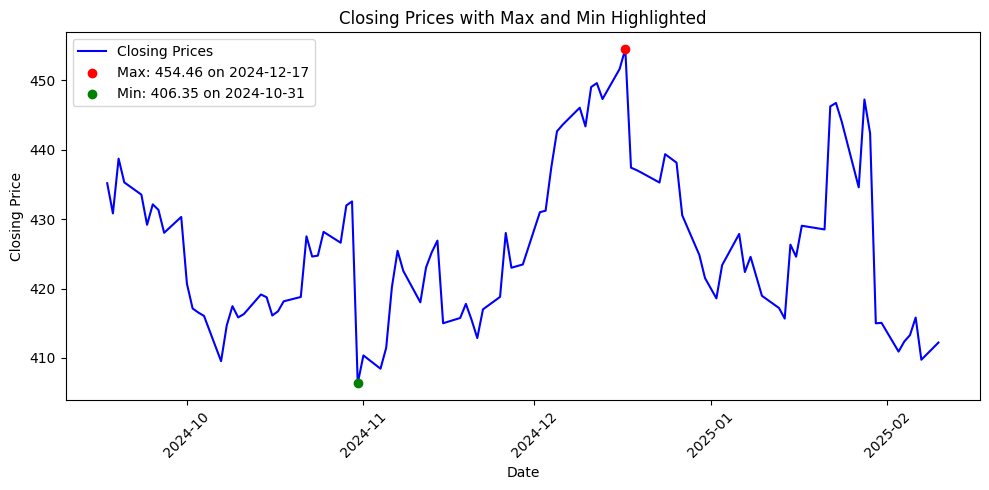

In [54]:
import matplotlib.pyplot as plt
import pandas as pd

def get_closing(date, d):
    close = float(d['Time Series (Daily)'][date]['4. close'])
    return close

prices = []
for date in d['Time Series (Daily)']:
  prices.append((get_closing(date, d), date))

prices2 = []
for date in d2['Time Series (Daily)']:
  prices2.append((get_closing(date, d2), date))

prices= sorted(prices, key=lambda x: x[1])
prices2= sorted(prices2, key=lambda x: x[1])
dates = [pair[1] for pair in prices]
closing_prices = [pair[0] for pair in prices]

max_price = max(closing_prices)
min_price = min(closing_prices)

dates = pd.to_datetime(dates)

max_date = dates[closing_prices.index(max_price)]
min_date = dates[closing_prices.index(min_price)]

print(f"Maximum price: {max_price} on {max_date.strftime('%Y-%m-%d')}")
print(f"Minimum price: {min_price} on {min_date.strftime('%Y-%m-%d')}")

plt.figure(figsize=(10, 5))
plt.plot(dates, closing_prices, label='Closing Prices', color='b')

plt.scatter(max_date, max_price, color='r', label=f'Max: {max_price} on {max_date.strftime("%Y-%m-%d")}', zorder=5)
plt.scatter(min_date, min_price, color='g', label=f'Min: {min_price} on {min_date.strftime("%Y-%m-%d")}', zorder=5)

plt.title('Closing Prices with Max and Min Highlighted')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


In [55]:
#Calculating buy day and sell day

left, right = 0, 1
profit = 0
buyDay = ""
sellDay = ""
buyDayPrice = 0
sellDayPrice = 0
while right < len(prices):
    if prices[left][0] < prices[right][0]:
        current_profit = prices[right][0] - prices[left][0]
        if current_profit > profit:
          profit = current_profit
          buyDay = prices[left][1]
          sellDay = prices[right][1]
          buyDayPrice = prices[left][0]
          sellDayPrice = prices[right][0]
    else:
        left = right
    right += 1
print(f"Buy Day: {buyDay} with a Price of {buyDayPrice}")
print(f"Sell Day: {sellDay} with a Price of {sellDayPrice}")
print(f"Profit:  {profit}")



Buy Day: 2024-10-31 with a Price of 406.35
Sell Day: 2024-12-17 with a Price of 454.46
Profit:  48.10999999999996


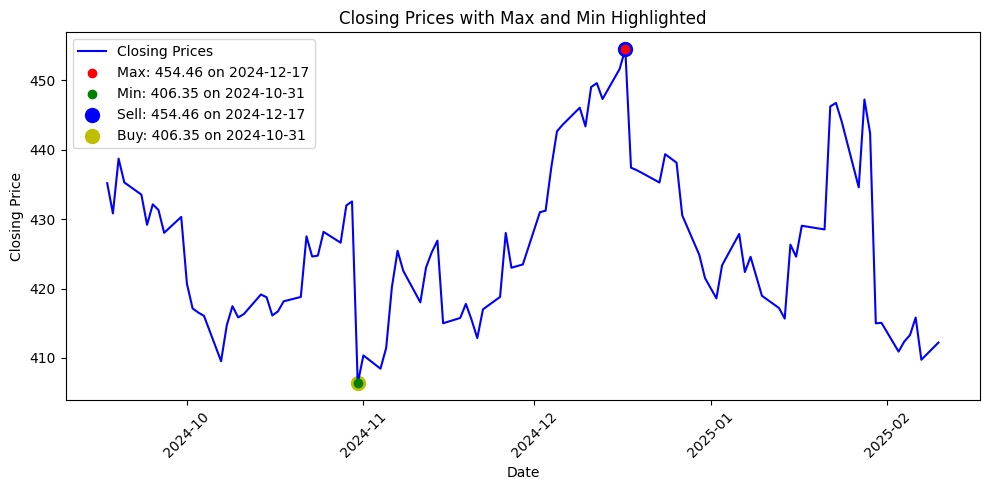

In [56]:

plt.figure(figsize=(10, 5))
plt.plot(dates, closing_prices, label='Closing Prices', color='b')

buyDay_dt = pd.to_datetime(buyDay)
sellDay_dt = pd.to_datetime(sellDay)

plt.scatter(max_date, max_price, color='r', label=f'Max: {max_price} on {max_date.strftime("%Y-%m-%d")}', zorder=5)
plt.scatter(min_date, min_price, color='g', label=f'Min: {min_price} on {min_date.strftime("%Y-%m-%d")}', zorder=5)
plt.scatter(sellDay_dt, sellDayPrice, color='b', marker='o', s=100, label=f'Sell: {max_price} on {max_date.strftime("%Y-%m-%d")}')
plt.scatter(buyDay_dt, buyDayPrice, color='y', marker='o', s=100, label=f'Buy: {min_price} on {min_date.strftime("%Y-%m-%d")}')


plt.title('Closing Prices with Max and Min Highlighted')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

In [57]:
#Exploring with other API
import requests


url = "https://www.alphavantage.co/query?function=INSIDER_TRANSACTIONS&symbol=GOOG&apikey=147LGXMNKZFU94BN"    # demo version
result = requests.get(url)
d = result.json()

print(d)

{'data': [{'transaction_date': '2025-01-25', 'ticker': 'GOOG', 'executive': "O'TOOLE, AMIE THUENER", 'executive_title': 'VP, Chief Accounting Officer', 'security_type': 'Class C Google Stock Units', 'acquisition_or_disposal': 'D', 'shares': '1340.0', 'share_price': '0.0'}, {'transaction_date': '2025-01-25', 'ticker': 'GOOG', 'executive': "O'TOOLE, AMIE THUENER", 'executive_title': 'VP, Chief Accounting Officer', 'security_type': 'Class C Capital Stock', 'acquisition_or_disposal': 'A', 'shares': '1340.0', 'share_price': '0.0'}, {'transaction_date': '2025-01-25', 'ticker': 'GOOG', 'executive': "O'TOOLE, AMIE THUENER", 'executive_title': 'VP, Chief Accounting Officer', 'security_type': 'Class C Google Stock Units', 'acquisition_or_disposal': 'D', 'shares': '1424.0', 'share_price': '201.9'}, {'transaction_date': '2025-01-23', 'ticker': 'GOOG', 'executive': 'PICHAI, SUNDAR', 'executive_title': 'Director, Chief Executive Officer', 'security_type': 'Class C Capital Stock', 'acquisition_or_dis

In [58]:
#API Exploration continued
import heapq
mp = {}
for entry in d['data']:
  if entry['executive'] not in mp:
    mp[entry['executive']] = 1
  else:
    mp[entry['executive']] += 1


top_5_items = heapq.nlargest(5, mp.items(), key=lambda x: x[1])

top_5_dict = dict(top_5_items)

print(top_5_dict)

{'PAGE, LAWRENCE': 3969, 'BRIN, SERGEY': 3353, 'PICHAI, SUNDAR': 1059, 'HENNESSY, JOHN L': 842, 'SERGEY, BRIN': 603}


In [59]:
#Extra Credit

import yfinance as yf
from scipy.stats import pearsonr
import pandas as pd


# Function to compute Pearson correlation coefficient between two stock prices
def compute_pearson_correlation(stock_data_1, stock_data_2):
    # Align the data based on the common dates
    merged_data = pd.merge(stock_data_1, stock_data_2, on='Date', how='inner')
    correlation, _ = pearsonr(merged_data['Price_x'], merged_data['Price_y'])
    return correlation

df1 = pd.DataFrame(prices, columns=["Price", "Date"])
df2 = pd.DataFrame(prices2, columns=["Price", "Date"])

# Compute correlation
correlation = compute_pearson_correlation(df1, df2)
print(f"Pearson Correlation Coefficient between MSFT and TSLA: {correlation}")

Pearson Correlation Coefficient between MSFT and TSLA: 0.4391885352706948


This metric measures the linear correlation between two sets of data, in this case the prices of TSLA and MSFT, we can see the correlation is a bit weak.

<br>
<hr>
<br>

### You're off and ~~running~~ **API'ing** !

There's no stopping now...

Include in this notebook - below - a short 4-6 sentence summary of
+ Which of your two (or more) stocks offers better "profit" opportunity -- for a single-share -- if you had a time machine that worked for the past 100 days?
+ What other API did you choose to try? What did you analyze from it?
+ How difficult/accessible did you find the Alphavantage documentation?
+ You're welcome to use AI for help + debugging
  + what are your thoughts: &nbsp; Was AI helpful on this?  &nbsp;&nbsp;  Was AI <i>un</i>helpful on this? &nbsp; Both? &nbsp; Neither?
+ Big-picture, how the API'ing and Python'ing went overall?


### Markdown cell for thoughts on this API/JSON/Python "API and Analysis" challenge:
The first stock I looked at was META and if I bought on 2024-09-16 with a price of 533.28 and sold on 2025-02-07 with a price of 714.52, I would have profited 181.24. The next was TSLA, if I had purchased on 2024-10-23 with a price of 213.65 and sold on 2024-12-17 with a price of 479.86, I would have profitted 266.21!

The API I looked at was insider transactions, this returns the latest and historical transactions made by key stakeholders. Specifically, I went through each trade the individuals made, and counted how many trades each executive made. I then returned the top 5 people. I had found that Lawrence Page had made the most at Google, totaling 3969 trades.

I found it very easy to navigate the Alphavantage documentation (I did notice a typo!).
AI was very helpful with graphing! In general, API'ing and Python'ing went great!




<hr>
<br>
<br>
<br>
<br>

<hr>

<br>




### Submitting...

This "API + Analysis" challenge will be due:
+ Thursday evening @ 11pm  (Feb. 13th)
+ Download this notebook and Submit to GradeScope
+ Join Econ176 by adding Gradescope course code <tt><b>R7G3NG</b></tt>

Onward!